# Data loading and cleaning

In [1]:
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('/kaggle/input/january-2025-sales/January 2025 Sales.csv')
df = df.drop([14,28,29,30])
df = df.drop(columns=['Store'])
df_clean = df.rename(columns={'3012':'Type Of Good'})
df_clean

,Type Of Good,2025,2024,Diff $,Diff %,Dept % contribution
0,STAPLES/BASIC MEALS,1792,1681,110,0.066,0.0137
1,COOKING & BAKING AIDS,17,22,-5,-0.219,0.0001
2,SAUCES & SPREADS,25,13,13,1.006,0.0002
3,CANNED,184,268,-84,-0.314,0.0014
4,BREAKFAST FOOD,745,497,248,0.499,0.0057
5,BAKERY,1599,1729,-130,-0.075,0.0122
6,BISCUITS,1242,832,410,0.492,0.0095
7,SNACKS,3138,2586,553,0.214,0.0240
8,CHOCOLATE & CONFECTIONARY,4933,5259,-326,-0.062,0.0377
9,MILK & MILK PRODUCTS,558,1053,-495,-0.47,0.0043


# Basic Statistics

In [3]:
print("\nBasic Statistics:")
print(f"Total Sales 2025: ${df_clean['2025'].sum():,.0f}")
print(f"Total Sales 2024: ${df_clean['2024'].sum():,.0f}")
print(f"Total Growth: ${df_clean['Diff $'].sum():,.0f} ({df_clean['Diff $'].sum()/df_clean['2024'].sum()*100:.1f}%)")
print(f"Number of Categories: {len(df_clean)}")


Basic Statistics:
Total Sales 2025: $130,743
Total Sales 2024: $120,139
Total Growth: $10,600 (8.8%)
Number of Categories: 27


# Graphs

In [4]:
df_clean['Diff %'] = pd.to_numeric(df_clean['Diff %'], errors='coerce')
df_clean['Dept % contribution'] = pd.to_numeric(df_clean['Dept % contribution'], errors='coerce')
df_clean['2025'] = pd.to_numeric(df_clean['2025'], errors='coerce')
df_clean['2024'] = pd.to_numeric(df_clean['2024'], errors='coerce')

# Remove rows where we have missing data
df_clean = df_clean.dropna(subset=['Diff %', 'Dept % contribution'])

# BCG Matrix explained:

The BCG Matrix (also called the Growth-Share Matrix) is a strategic planning tool created by the Boston Consulting Group in the 1970s. It helps companies decide how to prioritize their different businesses or product lines.

1. STARS (High Growth + High Sales Share)
   - Best performers! Fast growth high selling
   - Strategy: Invest more, give them marketing budget & shelf space
   
2. CASH GENERATORS (Low Growth + High Sales Share)  
   - Stable, reliable money makers
   - Strategy: Maintain them, use profits to fund Stars
   
3. RISING OPPORTUNITIES (High Growth + Low Sales Share)
   - Growing fast but small right now, potential to be stars
   - Strategy: Invest selectively in the most promising ones
   
4. UNDERPERFORMERS (Low Growth + Low Sales Share)
   - Not growing and not selling much
   - Strategy: Reconsider if they're worth keeping


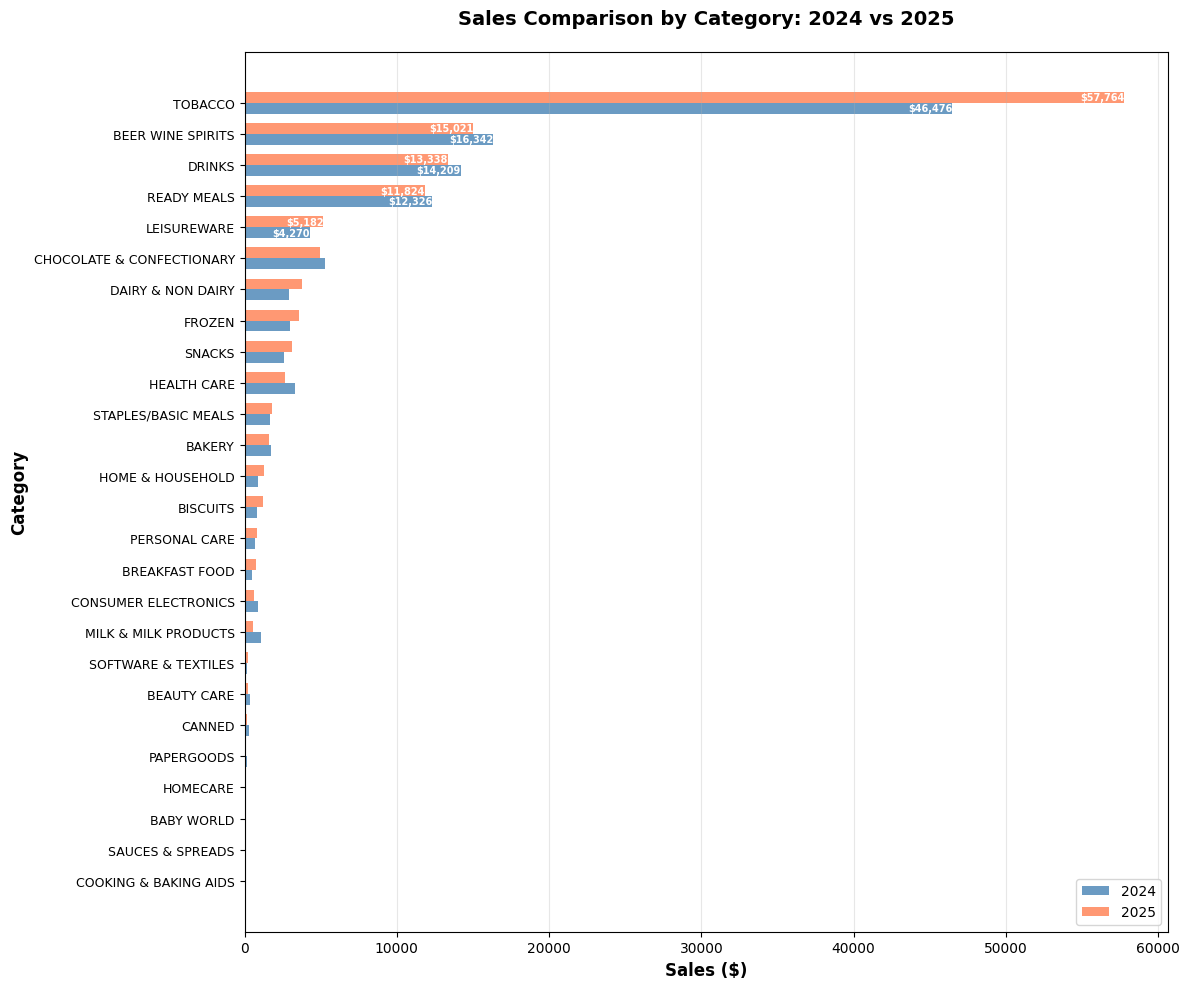

In [5]:
# Sort by 2025 sales for better visualization
df_clean = df_clean.sort_values('2025', ascending=True)

# Create figure
fig, ax = plt.subplots(figsize=(12, 10))
y_pos = np.arange(len(df_clean))
height = 0.35

# Create horizontal bars
bars1 = ax.barh(y_pos - height/2, df_clean['2024'], height, 
                label='2024', alpha=0.8, color='steelblue')
bars2 = ax.barh(y_pos + height/2, df_clean['2025'], height, 
                label='2025', alpha=0.8, color='coral')

# Customize the plot
ax.set_yticks(y_pos)
ax.set_yticklabels(df_clean['Type Of Good'], fontsize=9)
ax.set_xlabel('Sales ($)', fontsize=12, fontweight='bold')
ax.set_ylabel('Category', fontsize=12, fontweight='bold')
ax.set_title('Sales Comparison by Category: 2024 vs 2025', 
             fontsize=14, fontweight='bold', pad=20)
ax.legend(loc='lower right', fontsize=10)
ax.grid(axis='x', alpha=0.3)

# Add value labels on bars 
for i, (idx, row) in enumerate(df_clean.iterrows()):
    if row['2025'] > 5000:  # Only label large values
        ax.text(row['2024'], i - height/2, f"${row['2024']:,.0f}", 
                va='center', ha='right', fontsize=7, color='white', fontweight='bold')
        ax.text(row['2025'], i + height/2, f"${row['2025']:,.0f}", 
                va='center', ha='right', fontsize=7, color='white', fontweight='bold')

plt.tight_layout()
plt.savefig('horizontal_sales_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

In [6]:
# Step 1: Calculate growth rate 
df_clean['growth_rate'] = df_clean['Diff %'] * 100  # Convert to percentage

# Step 2: Use the 'Dept % contribution' column as sales share
df_clean['sales_share'] = df_clean['Dept % contribution'] * 100  # 
# Step 3: Find the median for both variables
median_growth = df_clean['growth_rate'].median()
median_share = df_clean['sales_share'].median()

print(f"\nMedian Growth Rate: {median_growth:.1f}%")
print(f"Median Sales Share: {median_share:.2f}%")
print("\nCategories above these medians are considered 'High'")

# Step 4: Classify each category
bcg_categories = []

# Go through each row and classify it
for index, row in df_clean.iterrows():
    growth = row['growth_rate']
    share = row['sales_share']
    
    # High growth AND high share = STAR
    if growth >= median_growth and share >= median_share:
        category = 'Stars'
    
    # Low growth BUT high share = CASH GENERATOR
    elif growth < median_growth and share >= median_share:
        category = 'Cash Generators'
    
    # High growth BUT low share = RISING OPPORTUNITY
    elif growth >= median_growth and share < median_share:
        category = 'Rising Opportunities'
    
    # Low growth AND low share = UNDERPERFORMER
    else:
        category = 'Underperformers'
    
    bcg_categories.append(category)

# Add the classifications to our dataframe
df_clean['BCG_Group'] = bcg_categories


# STARS
stars = df_clean[df_clean['BCG_Group'] == 'Stars']
print(f"\n STARS ({len(stars)} categories)")
print(f"Total Sales: ${stars['2025'].sum():,.0f}")
print(f"Sales Share: {stars['sales_share'].sum():.1f}%")
print("Top Stars:")
for i, (_, row) in enumerate(stars.nlargest(5, '2025').iterrows(), 1):
    print(f"  {i}. {row['Type Of Good']}: ${row['2025']:,.0f} (Growth: {row['growth_rate']:.1f}%)")

# CASH GENERATORS
cash_gen = df_clean[df_clean['BCG_Group'] == 'Cash Generators']
print(f"\n CASH GENERATORS ({len(cash_gen)} categories)")
print(f"Total Sales: ${cash_gen['2025'].sum():,.0f}")
print(f"Sales Share: {cash_gen['sales_share'].sum():.1f}%")
print("Top Cash Generators:")
for i, (_, row) in enumerate(cash_gen.nlargest(5, '2025').iterrows(), 1):
    print(f"  {i}. {row['Type Of Good']}: ${row['2025']:,.0f} (Growth: {row['growth_rate']:.1f}%)")

# RISING OPPORTUNITIES
rising = df_clean[df_clean['BCG_Group'] == 'Rising Opportunities']
print(f"\n RISING OPPORTUNITIES ({len(rising)} categories)")
print(f"Total Sales: ${rising['2025'].sum():,.0f}")
print(f"Sales Share: {rising['sales_share'].sum():.1f}%")
print("Top Rising Opportunities:")
for i, (_, row) in enumerate(rising.nlargest(5, '2025').iterrows(), 1):
    print(f"  {i}. {row['Type Of Good']}: ${row['2025']:,.0f} (Growth: {row['growth_rate']:.1f}%)")

# UNDERPERFORMERS
under = df_clean[df_clean['BCG_Group'] == 'Underperformers']
print(f"\n UNDERPERFORMERS ({len(under)} categories)")
print(f"Total Sales: ${under['2025'].sum():,.0f}")
print(f"Sales Share: {under['sales_share'].sum():.1f}%")
print("Categories to review:")
for i, (_, row) in enumerate(under.nlargest(5, '2025').iterrows(), 1):
    print(f"  {i}. {row['Type Of Good']}: ${row['2025']:,.0f} (Growth: {row['growth_rate']:.1f}%)")


Median Growth Rate: 1.2%
Median Sales Share: 0.95%

Categories above these medians are considered 'High'

 STARS (7 categories)
Total Sales: $76,452
Sales Share: 58.5%
Top Stars:
  1. TOBACCO: $57,764 (Growth: 24.3%)
  2. LEISUREWARE: $5,182 (Growth: 21.3%)
  3. DAIRY & NON DAIRY: $3,774 (Growth: 27.8%)
  4. FROZEN: $3,548 (Growth: 19.2%)
  5. SNACKS: $3,138 (Growth: 21.4%)

 CASH GENERATORS (6 categories)
Total Sales: $49,365
Sales Share: 37.8%
Top Cash Generators:
  1. BEER WINE SPIRITS: $15,021 (Growth: -8.1%)
  2. DRINKS: $13,338 (Growth: -6.1%)
  3. READY MEALS: $11,824 (Growth: -4.1%)
  4. CHOCOLATE & CONFECTIONARY: $4,933 (Growth: -6.2%)
  5. HEALTH CARE: $2,650 (Growth: -20.3%)

 RISING OPPORTUNITIES (6 categories)
Total Sales: $3,151
Sales Share: 2.4%
Top Rising Opportunities:
  1. BISCUITS: $1,242 (Growth: 49.2%)
  2. PERSONAL CARE: $847 (Growth: 20.0%)
  3. BREAKFAST FOOD: $745 (Growth: 49.9%)
  4. SOFTWARE & TEXTILES: $213 (Growth: 32.3%)
  5. HOMECARE: $79 (Growth: 35.2%)

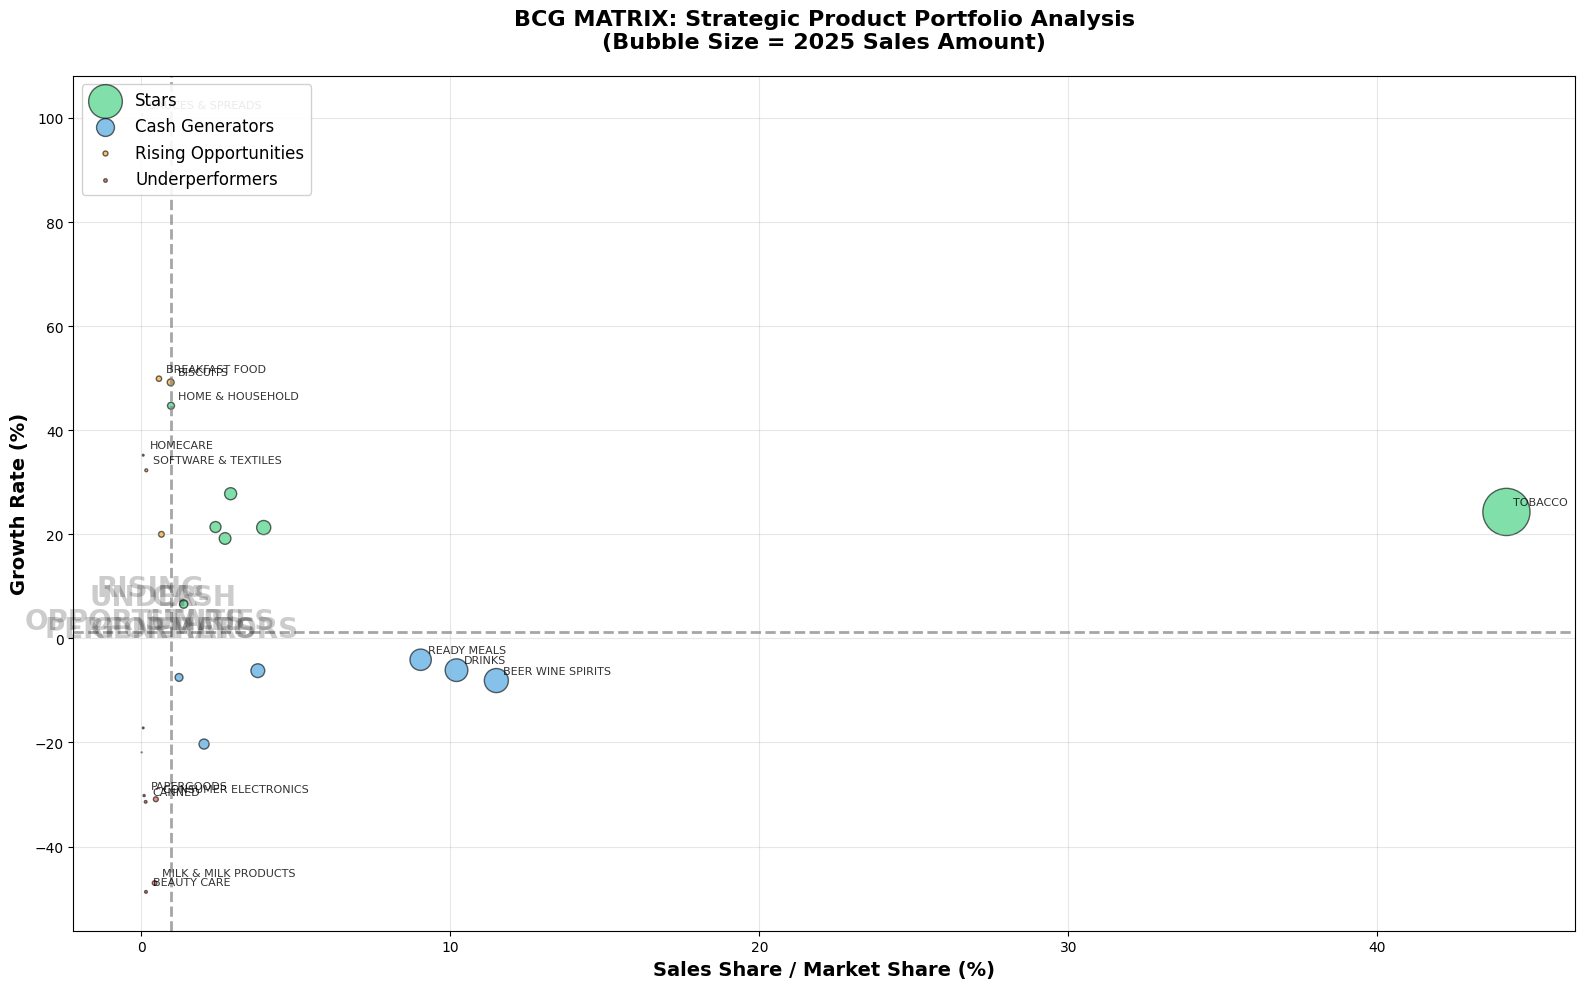

In [7]:
# Create a large figure
fig, ax = plt.subplots(figsize=(16, 10))

# Define colors for each group
color_map = {
    'Stars': '#2ecc71',  # Green
    'Cash Generators': '#3498db',  # Blue
    'Rising Opportunities': '#f39c12',  # Orange
    'Underperformers': '#e74c3c'  # Red
}

# Plot each group separately so we can color them differently
for group_name in ['Stars', 'Cash Generators', 'Rising Opportunities', 'Underperformers']:
    # Get data for this group
    group_data = df_clean[df_clean['BCG_Group'] == group_name]
    
    # Plot the points
    # x-axis = sales share
    # y-axis = growth rate
    # size of bubble = 2025 sales (divided by 50 to make reasonable size)
    ax.scatter(
        group_data['sales_share'],  # x position
        group_data['growth_rate'],   # y position
        s=group_data['2025'] / 50,   # bubble size
        alpha=0.6,                    # transparency
        c=color_map[group_name],      # color
        label=group_name,             # legend label
        edgecolors='black',           # black outline
        linewidth=1
    )

# Draw lines to divide the quadrants
ax.axhline(y=median_growth, color='gray', linestyle='--', linewidth=2, alpha=0.7)
ax.axvline(x=median_share, color='gray', linestyle='--', linewidth=2, alpha=0.7)

# Add text labels for each quadrant (big background text)
ax.text(median_share * 1.8, median_growth * 1.5, 'STARS', 
        fontsize=20, fontweight='bold', alpha=0.2, ha='center')
ax.text(median_share * 0.3, median_growth * 1.5, 'RISING\nOPPORTUNITIES', 
        fontsize=20, fontweight='bold', alpha=0.2, ha='center')
ax.text(median_share * 1.8, median_growth * 0.2, 'CASH\nGENERATORS', 
        fontsize=20, fontweight='bold', alpha=0.2, ha='center')
ax.text(median_share * 0.3, median_growth * 0.2, 'UNDER-\nPERFORMERS', 
        fontsize=20, fontweight='bold', alpha=0.2, ha='center')

# Label important categories (high sales or extreme growth)
for index, row in df_clean.iterrows():
    # Label if sales are high OR growth is very high/low
    if row['sales_share'] > 5 or abs(row['growth_rate']) > 30:
        ax.annotate(
            row['Type Of Good'],  # text to show
            (row['sales_share'], row['growth_rate']),  # position
            fontsize=8,
            alpha=0.8,
            xytext=(5, 5),  # offset from point
            textcoords='offset points'
        )

# Labels and title
ax.set_xlabel('Sales Share / Market Share (%)', fontsize=14, fontweight='bold')
ax.set_ylabel('Growth Rate (%)', fontsize=14, fontweight='bold')
ax.set_title('BCG MATRIX: Strategic Product Portfolio Analysis\n(Bubble Size = 2025 Sales Amount)', 
             fontsize=16, fontweight='bold', pad=20)

# Add legend
ax.legend(loc='upper left', fontsize=12, framealpha=0.9)

# Add grid for easier reading
ax.grid(alpha=0.3)

# Save and show
plt.tight_layout()
plt.savefig('bcg_matrix_analysis.png', dpi=300, bbox_inches='tight')
plt.show()



STEP 1: CALCULATING PERFORMANCE SCORES

 Performance scores 
  - Sales Score: Based on current contribution (60% weight)
  - Growth Score: Based on growth rate (40% weight)
  - Combined Performance Score: Weighted average

 STEP 2: SHELF SPACE CATEGORY


 EXPAND Shelf Space (2 categories):
   Current Sales: $57,789
   These deserve MORE shelf space and inventory

 MAINTAIN Shelf Space (0 categories):
   Current Sales: $0
   Keep current allocation

 MONITOR (9 categories):
   Current Sales: $19,175
   Watch closely, may reduce if trend continues

 REDUCE Shelf Space (15 categories):
   Current Sales: $53,767
   Free up space for better performers

 DETAILED SHELF SPACE RECOMMENDATIONS


 TOP 5 CATEGORIES TO EXPAND:


1. TOBACCO
   Current Sales: $57,764 (44.2% of total)
   Growth Rate: +24.3%
   Performance Score: 79.6/100
   Action: Increase shelf space by 15-25%
   Ensure consistent stock availability

2. SAUCES & SPREADS
   Current Sales: $25 (0.0% of total)
   Growth Rate: +100.6%

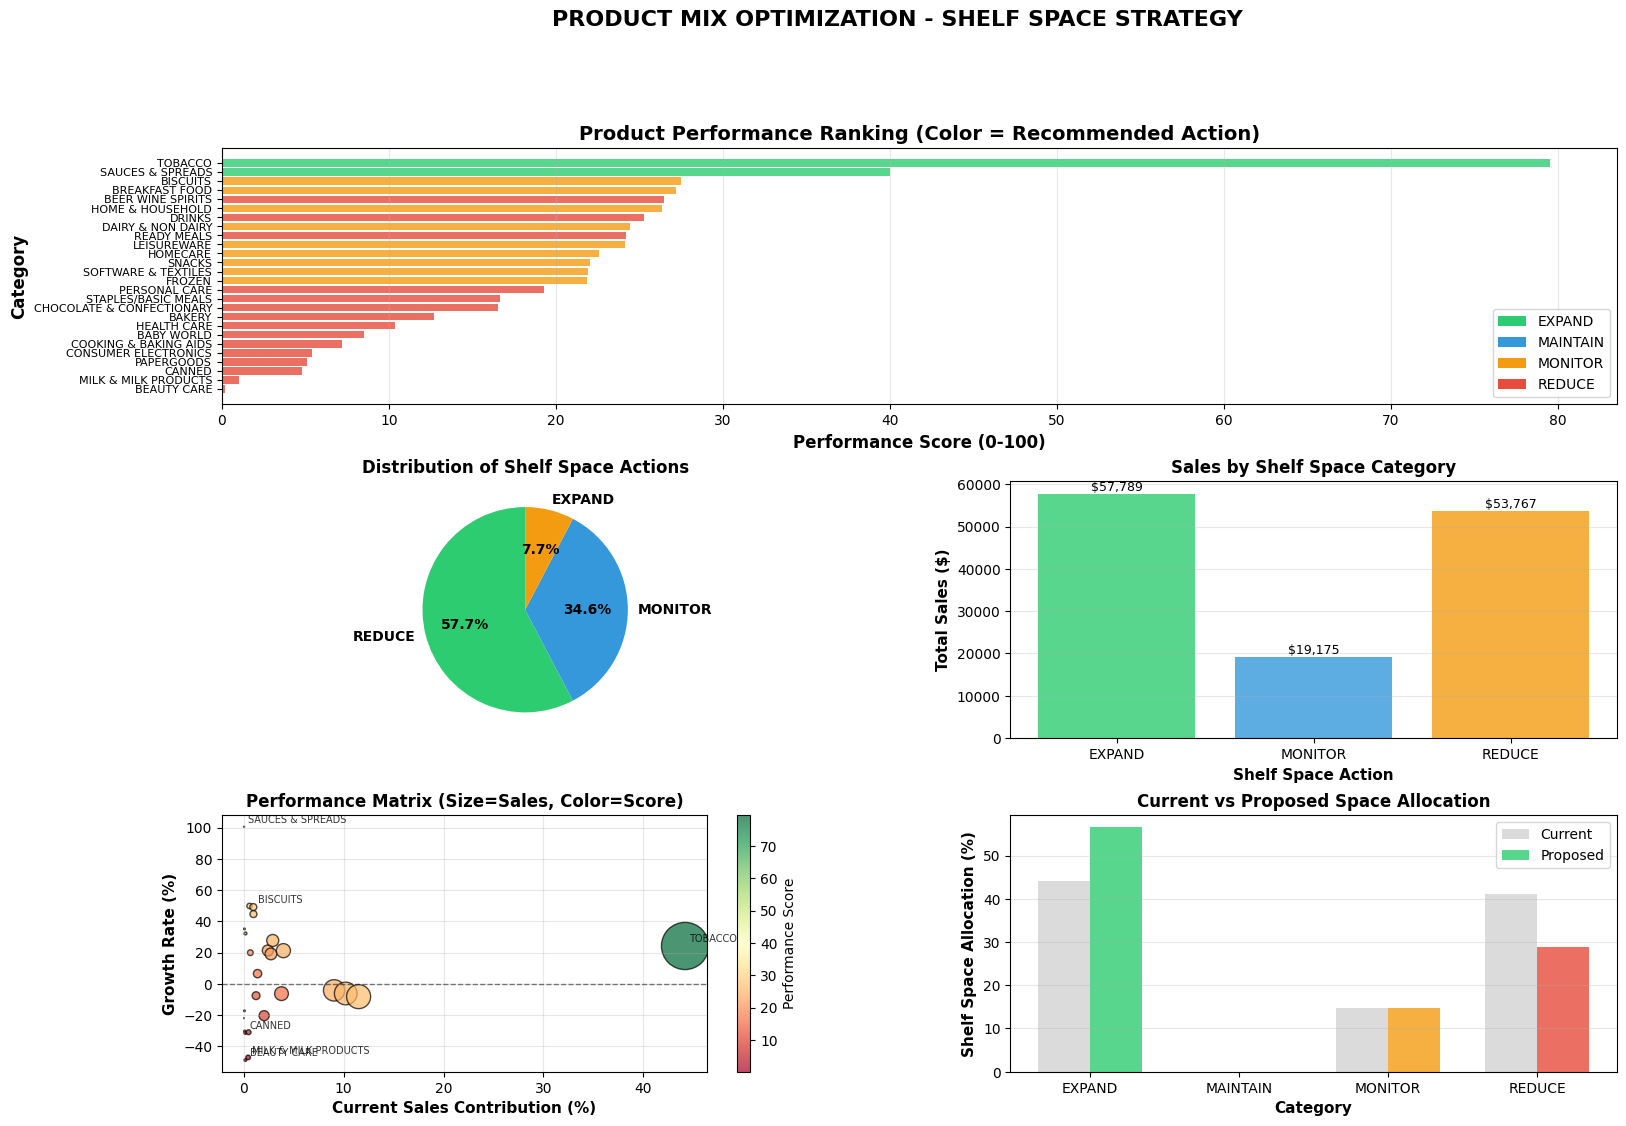


 SUMMARY - ACTION TO BE TAKEN


1. IMMEDIATE ACTIONS:
   - Expand shelf space for 2 high-performing categories
   - These represent $57,789 in current sales
   - Expected growth: +15-25% sales growth in these categories

2. SPACE OPTIMIZATION:
   - Reduce space for 15 underperforming categories
   - Free up 12.3% of total shelf space
   - Minimal sales impact (only $53,767 at risk)

3. EXPECTED RESULTS:
   - Potential additional revenue: $8,668
   - This is 6.6% of total sales
   - Better space utilization efficiency

4. RISK MITIGATION:
   - Monitor 9 categories closely
   - Maintain 0 stable categories
   - Review underperformers quarterly for discontinuation


In [10]:

# STEP 1: Calculate Performance Score

print("\nSTEP 1: CALCULATING PERFORMANCE SCORES\n")

# Normalize metrics to 0-100 scale 
# Sales contribution (higher = better)
df_clean['sales_score'] = (df_clean['Dept % contribution'] / df_clean['Dept % contribution'].max()) * 100

# Growth rate (higher = better, but need to handle negatives)
# Shift growth to make all positive, then normalize
min_growth = df_clean['Diff %'].min()
df_clean['growth_score'] = ((df_clean['Diff %'] - min_growth) / (df_clean['Diff %'].max() - min_growth)) * 100

# Calculate Overall Performance Score (weighted average)
# 60% weight on current sales, 40% weight on growth potential
df_clean['performance_score'] = (df_clean['sales_score'] * 0.6) + (df_clean['growth_score'] * 0.4)

print(f" Performance scores ")
print(f"  - Sales Score: Based on current contribution (60% weight)")
print(f"  - Growth Score: Based on growth rate (40% weight)")
print(f"  - Combined Performance Score: Weighted average")


# STEP 2: Categorize Products for Shelf Space Decisions

print("\n STEP 2: SHELF SPACE CATEGORY\n")

# Define categories based on performance score
def categorize_shelf_space(row):
    score = row['performance_score']
    growth = row['Diff %']
    contribution = row['Dept % contribution']
    
    # High performers - deserve MORE space
    if score >= 60:
        return 'EXPAND'
    
    # Good performers with high growth - deserve MORE space
    elif score >= 40 and growth > 0.1:  # 10% growth
        return 'EXPAND'
    
    # Stable performers - MAINTAIN current space
    elif score >= 30:
        return 'MAINTAIN'
    
    # Low performers but positive growth - MONITOR (possible reduction)
    elif score >= 20 and growth > 0:
        return 'MONITOR'
    
    # Poor performers - REDUCE space
    else:
        return 'REDUCE'

df_clean['shelf_action'] = df_clean.apply(categorize_shelf_space, axis=1)

# Count categories
expand = df_clean[df_clean['shelf_action'] == 'EXPAND']
maintain = df_clean[df_clean['shelf_action'] == 'MAINTAIN']
monitor = df_clean[df_clean['shelf_action'] == 'MONITOR']
reduce = df_clean[df_clean['shelf_action'] == 'REDUCE']

print(f"\n EXPAND Shelf Space ({len(expand)} categories):")
print(f"   Current Sales: ${expand['2025'].sum():,.0f}")
print(f"   These deserve MORE shelf space and inventory")

print(f"\n MAINTAIN Shelf Space ({len(maintain)} categories):")
print(f"   Current Sales: ${maintain['2025'].sum():,.0f}")
print(f"   Keep current allocation")

print(f"\n MONITOR ({len(monitor)} categories):")
print(f"   Current Sales: ${monitor['2025'].sum():,.0f}")
print(f"   Watch closely, may reduce if trend continues")

print(f"\n REDUCE Shelf Space ({len(reduce)} categories):")
print(f"   Current Sales: ${reduce['2025'].sum():,.0f}")
print(f"   Free up space for better performers")


# STEP 3: Specific Recommendations

print("\n DETAILED SHELF SPACE RECOMMENDATIONS\n")

print("\n TOP 5 CATEGORIES TO EXPAND:\n")
top_expand = df_clean.nlargest(5, 'performance_score')
for i, (_, row) in enumerate(top_expand.iterrows(), 1):
    print(f"\n{i}. {row['Type Of Good']}")
    print(f"   Current Sales: ${row['2025']:,.0f} ({row['Dept % contribution']*100:.1f}% of total)")
    print(f"   Growth Rate: {row['Diff %']*100:+.1f}%")
    print(f"   Performance Score: {row['performance_score']:.1f}/100")
    print(f"   Action: Increase shelf space by 15-25%")
    print(f"   Ensure consistent stock availability")

print("\n TOP 5 CATEGORIES TO REDUCE:\n")
bottom_reduce = df_clean.nsmallest(5, 'performance_score')
for i, (_, row) in enumerate(bottom_reduce.iterrows(), 1):
    print(f"\n{i}. {row['Type Of Good']}")
    print(f"   Current Sales: ${row['2025']:,.0f} ({row['Dept % contribution']*100:.1f}% of total)")
    print(f"   Growth Rate: {row['Diff %']*100:+.1f}%")
    print(f"   Performance Score: {row['performance_score']:.1f}/100")
    print(f"   Action: Reduce shelf space by 20-40%")
    print(f"   Consider: Discontinuing if trend continues")


# STEP 4: Calculate Potential Space Reallocation

print("\n SPACE REALLOCATION PLAN\n")

# Assume total shelf space is proportional to current sales contribution
# Calculate how much space to free up from REDUCE categories
space_to_free = reduce['Dept % contribution'].sum() * 0.3  # Free 30% of their space
space_needed = expand['Dept % contribution'].sum() * 0.2  # Add 20% to expand categories

print(f"\nCurrent Space Allocation:")
print(f"  - EXPAND categories: {expand['Dept % contribution'].sum()*100:.1f}% of store")
print(f"  - MAINTAIN categories: {maintain['Dept % contribution'].sum()*100:.1f}% of store")
print(f"  - MONITOR categories: {monitor['Dept % contribution'].sum()*100:.1f}% of store")
print(f"  - REDUCE categories: {reduce['Dept % contribution'].sum()*100:.1f}% of store")

print(f"\nRecommended Changes:")
print(f"  - Free up {space_to_free*100:.1f}% from REDUCE categories")
print(f"  - Reallocate to EXPAND categories")
print(f"  - Net space gain for high performers: {space_to_free*100:.1f}%")


# VISUALIZATIONS


fig = plt.figure(figsize=(18, 12))
gs = fig.add_gridspec(3, 2, hspace=0.3, wspace=0.3)

# 1. Performance Score Ranking
ax1 = fig.add_subplot(gs[0, :])
df_sorted = df_clean.sort_values('performance_score', ascending=True)
colors = df_sorted['shelf_action'].map({
    'EXPAND': '#2ecc71',
    'MAINTAIN': '#3498db', 
    'MONITOR': '#f39c12',
    'REDUCE': '#e74c3c'
})
bars = ax1.barh(df_sorted['Type Of Good'], df_sorted['performance_score'], color=colors, alpha=0.8)
ax1.set_xlabel('Performance Score (0-100)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Category', fontsize=12, fontweight='bold')
ax1.set_title('Product Performance Ranking (Color = Recommended Action)', fontsize=14, fontweight='bold')
ax1.grid(axis='x', alpha=0.3)
ax1.tick_params(axis='y', labelsize=8)

# Add legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='#2ecc71', label='EXPAND'),
    Patch(facecolor='#3498db', label='MAINTAIN'),
    Patch(facecolor='#f39c12', label='MONITOR'),
    Patch(facecolor='#e74c3c', label='REDUCE')
]
ax1.legend(handles=legend_elements, loc='lower right', fontsize=10)

# 2. Shelf Space Action Pie Chart
ax2 = fig.add_subplot(gs[1, 0])
action_counts = df_clean['shelf_action'].value_counts()
colors_pie = ['#2ecc71', '#3498db', '#f39c12', '#e74c3c']
ax2.pie(action_counts, labels=action_counts.index, autopct='%1.1f%%',
        startangle=90, colors=colors_pie, textprops={'fontsize': 10, 'fontweight': 'bold'})
ax2.set_title('Distribution of Shelf Space Actions', fontsize=12, fontweight='bold')

# 3. Sales Contribution by Action
ax3 = fig.add_subplot(gs[1, 1])
action_sales = df_clean.groupby('shelf_action')['2025'].sum()
bars3 = ax3.bar(action_sales.index, action_sales.values, color=colors_pie, alpha=0.8)
ax3.set_ylabel('Total Sales ($)', fontsize=11, fontweight='bold')
ax3.set_xlabel('Shelf Space Action', fontsize=11, fontweight='bold')
ax3.set_title('Sales by Shelf Space Category', fontsize=12, fontweight='bold')
ax3.grid(axis='y', alpha=0.3)
# Add value labels on bars
for bar in bars3:
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height,
            f'${height:,.0f}', ha='center', va='bottom', fontsize=9)

# 4. Performance Matrix
ax4 = fig.add_subplot(gs[2, 0])
scatter = ax4.scatter(df_clean['Dept % contribution']*100, df_clean['Diff %']*100,
                     s=df_clean['2025']/50, c=df_clean['performance_score'],
                     cmap='RdYlGn', alpha=0.7, edgecolors='black', linewidth=1)
ax4.set_xlabel('Current Sales Contribution (%)', fontsize=11, fontweight='bold')
ax4.set_ylabel('Growth Rate (%)', fontsize=11, fontweight='bold')
ax4.set_title('Performance Matrix (Size=Sales, Color=Score)', fontsize=12, fontweight='bold')
ax4.axhline(y=0, color='black', linestyle='--', linewidth=1, alpha=0.5)
ax4.grid(alpha=0.3)
plt.colorbar(scatter, ax=ax4, label='Performance Score')

# Label top and bottom performers
for _, row in df_clean.nlargest(3, 'performance_score').iterrows():
    ax4.annotate(row['Type Of Good'], 
                (row['Dept % contribution']*100, row['Diff %']*100),
                fontsize=7, alpha=0.8, xytext=(3, 3), textcoords='offset points')
for _, row in df_clean.nsmallest(3, 'performance_score').iterrows():
    ax4.annotate(row['Type Of Good'], 
                (row['Dept % contribution']*100, row['Diff %']*100),
                fontsize=7, alpha=0.8, xytext=(3, 3), textcoords='offset points')

# 5. Recommended Space Reallocation - FIX: Ensure matching array lengths
ax5 = fig.add_subplot(gs[2, 1])

# Get categories in consistent order
categories = ['EXPAND', 'MAINTAIN', 'MONITOR', 'REDUCE']
current_space = []
proposed_space = []
bar_colors = []

# Map colors
color_dict = {'EXPAND': '#2ecc71', 'MAINTAIN': '#3498db', 'MONITOR': '#f39c12', 'REDUCE': '#e74c3c'}

for cat in categories:
    cat_data = df_clean[df_clean['shelf_action'] == cat]
    current = cat_data['Dept % contribution'].sum() * 100
    current_space.append(current)
    bar_colors.append(color_dict[cat])
    
    if cat == 'EXPAND':
        proposed_space.append(current + space_to_free*100)
    elif cat == 'REDUCE':
        proposed_space.append(current - space_to_free*100)
    else:
        proposed_space.append(current)

x = np.arange(len(categories))
width = 0.35
bars1 = ax5.bar(x - width/2, current_space, width, label='Current', alpha=0.8, color='lightgray')
bars2 = ax5.bar(x + width/2, proposed_space, width, label='Proposed', alpha=0.8, color=bar_colors)

ax5.set_ylabel('Shelf Space Allocation (%)', fontsize=11, fontweight='bold')
ax5.set_xlabel('Category', fontsize=11, fontweight='bold')
ax5.set_title('Current vs Proposed Space Allocation', fontsize=12, fontweight='bold')
ax5.set_xticks(x)
ax5.set_xticklabels(categories, rotation=0)
ax5.legend()
ax5.grid(axis='y', alpha=0.3)

plt.suptitle('PRODUCT MIX OPTIMIZATION - SHELF SPACE STRATEGY', 
            fontsize=16, fontweight='bold', y=0.995)
plt.savefig('product_mix_optimization.png', dpi=300, bbox_inches='tight')
plt.show()


print("\n SUMMARY - ACTION TO BE TAKEN\n")

print(f"\n1. IMMEDIATE ACTIONS:")
print(f"   - Expand shelf space for {len(expand)} high-performing categories")
print(f"   - These represent ${expand['2025'].sum():,.0f} in current sales")
print(f"   - Expected growth: +15-25% sales growth in these categories")

print(f"\n2. SPACE OPTIMIZATION:")
print(f"   - Reduce space for {len(reduce)} underperforming categories")
print(f"   - Free up {space_to_free*100:.1f}% of total shelf space")
print(f"   - Minimal sales impact (only ${reduce['2025'].sum():,.0f} at risk)")

print(f"\n3. EXPECTED RESULTS:")
total_sales = df_clean['2025'].sum()
expected_gain = expand['2025'].sum() * 0.15  # 15% increase on expand categories
print(f"   - Potential additional revenue: ${expected_gain:,.0f}")
print(f"   - This is {expected_gain/total_sales*100:.1f}% of total sales")
print(f"   - Better space utilization efficiency")

print(f"\n4. RISK MITIGATION:")
print(f"   - Monitor {len(monitor)} categories closely")
print(f"   - Maintain {len(maintain)} stable categories")
print(f"   - Review underperformers quarterly for discontinuation")



# SUMMARY

In [9]:
print("\n SUMMARY - ACTION TO BE TAKEN\n")

print(f"\n1. IMMEDIATE ACTIONS:")
print(f"   - Expand shelf space for {len(expand)} high-performing categories")
print(f"   - These represent ${expand['2025'].sum():,.0f} in current sales")
print(f"   - Expected impact: +15-25% sales growth in these categories")

print(f"\n2. SPACE OPTIMIZATION:")
print(f"   - Reduce space for {len(reduce)} underperforming categories")
print(f"   - Free up {space_to_free*100:.1f}% of total shelf space")
print(f"   - Minimal sales impact (only ${reduce['2025'].sum():,.0f} at risk)")

print(f"\n3. EXPECTED RESULTS:")
total_sales = df_clean['2025'].sum()
expected_gain = expand['2025'].sum() * 0.15  # 15% increase on expand categories
print(f"   - Additional revenue: ${expected_gain:,.0f}")
print(f"   - This is {expected_gain/total_sales*100:.1f}% of total sales")
print(f"   - Better space utilization efficiency")

print(f"\n4. RISK MITIGATION:")
print(f"   - Monitor {len(monitor)} categories closely")

print(f"   - Review underperformers quarterly or semiannually for discontinuation")


 SUMMARY - ACTION TO BE TAKEN


1. IMMEDIATE ACTIONS:
   - Expand shelf space for 2 high-performing categories
   - These represent $57,789 in current sales
   - Expected impact: +15-25% sales growth in these categories

2. SPACE OPTIMIZATION:
   - Reduce space for 15 underperforming categories
   - Free up 12.3% of total shelf space
   - Minimal sales impact (only $53,767 at risk)

3. EXPECTED RESULTS:
   - Additional revenue: $8,668
   - This is 6.6% of total sales
   - Better space utilization efficiency

4. RISK MITIGATION:
   - Monitor 9 categories closely
   - Review underperformers quarterly or semiannually for discontinuation
